# Research of apartments for sale

You have at your disposal the data of the Yandex.Real estate service - an archive of advertisements for the sale of apartments in St. Petersburg and neighboring settlements for several years. You need to learn how to determine the market value of real estate objects. Your task is to set the parameters. This will allow building an automated system: it will track anomalies and fraudulent activity.

There are two types of data available for each apartment for sale. The first ones are entered by the user, the second ones are obtained automatically based on cartographic data. For example, the distance to the city center, airport, nearest park and water body.

### Content: 
<a id='Начало'></a>

<a href='#Шаг 1'>Step 1. Data exploration</a>

<a href='#Шаг 2'>Step 2. Data preprocessing</a>

<a href='#Шаг 3'>Step 3. Calculations</a>

<a href='#Шаг 4'>Step 4. Conduct exploratory analysis</a>

<a href='#Шаг 5'>Step 5. General conclusion</a>


### Step 1. Data exploration
<a id='Шаг 1'></a>

In [1]:
# import Pandas
import pandas as pd

# we fit the entire table into the browser window. So gaps "..." will not be visible
pd.set_option('display.max_columns', 500)

# remove warnings
import warnings
warnings.filterwarnings('ignore')

# setting the beauty of tables
from IPython.display import display

estate_data = pd.read_csv('real_estate_data.csv', sep = '\t')
estate_data.sample(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
4797,10,3638724.0,34.36,2018-10-11T00:00:00,1,NaN,5.0,10.0,2,NaN,False,False,NaN,NaN,Санкт-Петербург,47325.0,25220.0,1.0,246.0,1.0,786.0,134.0
4342,8,2600000.0,33.00,2019-02-12T00:00:00,1,2.65,5.0,20.0,1,NaN,False,False,9.8,NaN,Шлиссельбург,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20153,20,4490000.0,40.40,2018-12-04T00:00:00,1,2.57,9.0,18.3,7,NaN,False,False,10.8,NaN,Санкт-Петербург,10345.0,11962.0,0.0,NaN,0.0,NaN,84.0
2019,12,2400000.0,35.50,2018-10-30T00:00:00,1,2.60,5.0,17.2,1,NaN,False,False,8.8,NaN,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,72.0
2756,1,13040000.0,196.00,2018-08-07T00:00:00,5,2.80,4.0,NaN,4,NaN,False,False,NaN,NaN,Сестрорецк,54526.0,35625.0,0.0,NaN,0.0,NaN,107.0
12241,10,4100000.0,40.00,2017-09-26T00:00:00,2,3.03,5.0,29.1,1,NaN,False,False,6.5,NaN,Санкт-Петербург,30942.0,5839.0,0.0,NaN,1.0,919.0,181.0
21679,2,3500000.0,33.00,2017-11-11T00:00:00,1,NaN,22.0,15.6,17,NaN,False,False,8.3,1.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,82.0
22707,2,8950000.0,75.50,2018-02-09T00:00:00,2,2.80,20.0,35.0,18,NaN,False,False,16.6,2.0,Санкт-Петербург,39357.0,10581.0,2.0,288.0,3.0,311.0,271.0
19270,19,4000000.0,33.00,2017-04-06T00:00:00,1,NaN,9.0,16.0,1,NaN,False,False,9.0,0.0,Санкт-Петербург,11070.0,14446.0,0.0,NaN,0.0,NaN,12.0
23575,15,5750000.0,65.00,2015-07-02T00:00:00,3,2.60,9.0,42.0,1,NaN,False,False,10.0,0.0,Санкт-Петербург,15871.0,14807.0,1.0,555.0,0.0,NaN,546.0


In [2]:
estate_data_part = estate_data.loc[:,'is_apartment':'open_plan']
display(estate_data_part.sample(5))

,is_apartment,studio,open_plan
11635,NaN,False,False
18908,NaN,False,False
11906,NaN,False,False
21713,NaN,False,False
22357,NaN,False,False


In [3]:
estate_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [4]:
estate_data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

### Conclusion
<a id='Шаг 1. Вывод'></a>

At the input, we have a DF consisting of 23698 rows and 22 columns. The object contains four types of data:

- int64 - integer variables (3 columns)
- float64 - floating point (14 columns)
- object - data of the "string" type (3 columns)
- bool - data of the "boolean" type (2 columns)

It is required to change the names of the capitals: `cityCenters_nearest`, `parks_around3000`, `ponds_around3000`.
It is required to convert to readable form (temporary format) `first_day_exposition`

There are gaps:
    
- ceiling_height          
- floors_total            
- living_area             
- is_apartment            
- kitchen_area            
- balcony                 
- locality_name           
- airports_nearest        
- cityCenters_nearest     
- parks_around3000        
- parks_nearest          
- ponds_around3000        
- ponds_nearest           
- days_exposition         

<a href='#Начало'>В начало</a>

### Step 2. Data preprocessing
<a id='Шаг 2'></a>

#### data correction

In [5]:
# put the column names in order
print('new names for the columns')
estate_data.columns = ['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_сenters_nearest',
       'parks_around_3000', 'parks_nearest', 'ponds_around_3000',
       'ponds_nearest', 'days_exposition']

print(estate_data.columns)
print()

# convert the date to readable form
estate_data['first_day_exposition'] = pd.to_datetime(estate_data['first_day_exposition'], format = '%Y-%m-%d')
print('Checking the format of the data column')
display(estate_data['first_day_exposition'].head())

# we will convert the names of objects to lower case to avoid misspelling
estate_data['locality_name'] = estate_data['locality_name'].str.lower()

new names for the columns
Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_сenters_nearest',
       'parks_around_3000', 'parks_nearest', 'ponds_around_3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

Checking the format of the data column


0   2019-03-07
1   2018-12-04
2   2015-08-20
3   2015-07-24
4   2018-06-19
Name: first_day_exposition, dtype: datetime64[ns]

#### processing passes

In [6]:
# see the gaps (obvious lines first)
# balconies
print('Пропуски до в столбце balcony:',  estate_data['balcony'].isna().sum())
# if info about balconies NaN presumably there are no balconies, replace with 0
estate_data['balcony'] = estate_data['balcony'].fillna(0)
print('Пропуски после в столбце balcony:',  estate_data['balcony'].isna().sum())

#check the passes in the apartment category
print('Пропуски до в столбце is_apartment:',  estate_data['is_apartment'].isna().sum())
# most sellers decided not to indicate (or forgot to indicate) the type of apartment.
# most likely these are ordinary apartments, i.e. is_apartment = False
estate_data.loc[(estate_data['is_apartment'].isna()), 'is_apartment'] = False
print('Пропуски после столбце is_apartment:',  estate_data['is_apartment'].isna().sum())

# if the number of parks_around_3000 = NaN, then parks_around_3000 = 0
# if the number of parks_around_3000 = 0, then parks_nearest = 3000
print('Пропуски до в столбце parks_around_3000:',  estate_data['parks_around_3000'].isna().sum())
estate_data['parks_around_3000'] = estate_data['parks_around_3000'].fillna(0)
print('Пропуски после в столбце parks_around_3000:',  estate_data['parks_around_3000'].isna().sum())
print('Пропуски до в столбце parks_nearest:',  estate_data['parks_nearest'].isna().sum())
estate_data.loc[(estate_data['parks_around_3000'] == 0) & (estate_data['parks_nearest'].isna()), 'parks_nearest'] = 3000
print('Пропуски после в столбце parks_nearest:',  estate_data['parks_nearest'].isna().sum())

# if the number of reservoirs ponds_around_3000 = NaN, then ponds_around_3000 = 0
# if the number of ponds_around_3000 = 0, then ponds_nearest = 3000
print('Пропуски до в столбце ponds_around_3000:',  estate_data['ponds_around_3000'].isna().sum())
estate_data['ponds_around_3000'] = estate_data['ponds_around_3000'].fillna(0)
print('Пропуски после в столбце ponds_around_3000:',  estate_data['ponds_around_3000'].isna().sum())
print('Пропуски до в столбце ponds_nearest:',  estate_data['ponds_nearest'].isna().sum())
estate_data.loc[(estate_data['ponds_around_3000'] == 0) & (estate_data['ponds_nearest'].isna()), 'ponds_nearest'] = 3000
print('Пропуски после в столбце ponds_nearest:',  estate_data['ponds_nearest'].isna().sum())


Пропуски до в столбце balcony: 11519
Пропуски после в столбце balcony: 0
Пропуски до в столбце is_apartment: 20924
Пропуски после столбце is_apartment: 0
Пропуски до в столбце parks_around_3000: 5518
Пропуски после в столбце parks_around_3000: 0
Пропуски до в столбце parks_nearest: 15620
Пропуски после в столбце parks_nearest: 0
Пропуски до в столбце ponds_around_3000: 5518
Пропуски после в столбце ponds_around_3000: 0
Пропуски до в столбце ponds_nearest: 14589
Пропуски после в столбце ponds_nearest: 0


In [7]:

# have a look on empty values in column locality_name
print('Пропуски до в столбце locality_name:',  estate_data['locality_name'].isna().sum())
empty_locality_name = estate_data.query('locality_name != locality_name')
# there are 49 of them. It is not possible to determine the location of these apartments according to the available sample
# for the final result, this will not be enough, remove the data from DF
estate_data = estate_data.dropna(subset = ['locality_name'])
print('Пропуски после столбце locality_name:',  estate_data['locality_name'].isna().sum())

# see missing in airports_nearest
print('Пропуски до в столбце airports_nearest:',  estate_data['airports_nearest'].isna().sum())
# fill the gaps airports_nearest with media values
median_airports_nearest = estate_data['airports_nearest'].mean()
estate_data.loc[estate_data['airports_nearest'].isna(), 'airports_nearest'] = median_airports_nearest
print('Пропуски после столбце airports_nearest:',  estate_data['airports_nearest'].isna().sum())

# see skips city_centers_nearest
print('Пропуски до в столбце city_сenters_nearest:',  estate_data['city_сenters_nearest'].isna().sum())
# fill the gaps city_centers_nearest with media values
median_city_сenters_nearest = estate_data['city_сenters_nearest'].mean()
estate_data.loc[estate_data['city_сenters_nearest'].isna(), 'city_сenters_nearest'] = median_city_сenters_nearest
print('Пропуски после столбце city_сenters_nearest:',  estate_data['city_сenters_nearest'].isna().sum())


Пропуски до в столбце locality_name: 49
Пропуски после столбце locality_name: 0
Пропуски до в столбце airports_nearest: 5534
Пропуски после столбце airports_nearest: 0
Пропуски до в столбце city_сenters_nearest: 5511
Пропуски после столбце city_сenters_nearest: 0


In [8]:
# have a look on empty values in column floors_total
print('Пропуски до в столбце floors_total:',  estate_data['floors_total'].isna().sum())

# DF by grouped values ('locality_name', 'city_centers_nearest'), 
# because the values practically reflect the address of the house

medians = (estate_data.groupby(['locality_name','city_сenters_nearest'])
           .agg({'floors_total': 'median'})
           .rename(columns = {'floors_total': 'median_floors_total'}))

# attach to the original DF
estate_data = estate_data.merge(medians, on = ['locality_name','city_сenters_nearest'])
# an extra column median_floors_total is obtained
estate_data[['locality_name','city_сenters_nearest','floors_total','median_floors_total']][estate_data['floors_total']
                                                                                           .isna()].head()

# those values where floors_total = empty - fill in from median_floors_total
estate_data.loc[estate_data['floors_total'].isna(), 'floors_total'] = estate_data.loc[estate_data['floors_total']
                                                                                      .isna(), 'median_floors_total']
print('Пропуски после в столбце floors_total итерация 1:',  estate_data['floors_total'].isna().sum())

# not all the gaps are gone after the first grouping, the rest will be filled with the median
median_floors_total = estate_data['floors_total'].mean()
estate_data.loc[estate_data['floors_total'].isna(), 'floors_total'] = median_floors_total
print('Пропуски после в столбце floors_total итерация 2:',  estate_data['floors_total'].isna().sum())

Пропуски до в столбце floors_total: 85
Пропуски после в столбце floors_total итерация 1: 10
Пропуски после в столбце floors_total итерация 2: 0


Пропуски до в столбце days_exposition: 3180
Пропуски после в столбце days_exposition: 0


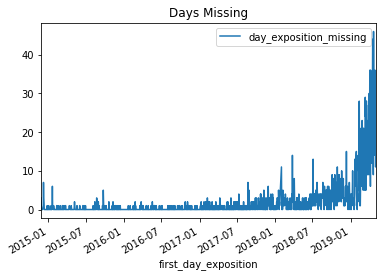

In [9]:
# have a look at the values of ad posts
import datetime as dt
import matplotlib.pyplot as plt
now = dt.datetime.now()
print('Пропуски до в столбце days_exposition:',  estate_data['days_exposition'].isna().sum())

# set a new column that determines whether the date is missing or not
estate_data['day_exposition_missing'] = estate_data['days_exposition'].isna().astype(int)

# summarize and plot
grouped_day_missing = estate_data.groupby('first_day_exposition').agg(
    {'day_exposition_missing': 'sum'}).plot(title='Days Missing')

# The number of skips increases towards the end of the period under review. It turns out that gaps show unclosed deals
# Let's assume that the upload date is the last day of observations
max_date = estate_data['first_day_exposition'].max()

# fill in the gaps with the difference between max_date and first_day_exposition in days
estate_data.loc[estate_data['days_exposition'].isna(), 'days_exposition'] = (
    max_date - estate_data.loc[estate_data['days_exposition'].isna(), 'first_day_exposition']).dt.days
print('Пропуски после в столбце days_exposition:',  estate_data['days_exposition'].isna().sum())

In [10]:
# by analogy with floors_total, let's see the gaps in the ceiling_height
print('Пропуски до в столбце ceiling_height:',  estate_data['ceiling_height'].isna().sum())

# DF by grouped values ('locality_name', 'city_centers_nearest'), 
# because the values practically reflect the address of the house
medians_height = (estate_data.groupby(['locality_name','city_сenters_nearest'])
                  .agg({'ceiling_height': 'median'})
                  .rename(columns = {'ceiling_height': 'median_ceiling_height'}))

# attach to the original DF
estate_data = estate_data.merge(medians_height, on = ['locality_name','city_сenters_nearest'])
# an additional column median_ceiling_height is obtained
estate_data[['locality_name','city_сenters_nearest','ceiling_height','median_ceiling_height']][estate_data['ceiling_height']
                                                                                               .isna()].head()
# those values where ceiling_height = empty - fill from median_ceiling_height
estate_data.loc[estate_data['ceiling_height'].isna(), 'ceiling_height'] = estate_data.loc[estate_data['ceiling_height']
                                                                                          .isna(), 'median_ceiling_height']

print('Пропуски после в столбце ceiling_height итерация 1:',  estate_data['ceiling_height'].isna().sum())
median_2_ceiling_height = estate_data['ceiling_height'].mean()
estate_data.loc[estate_data['ceiling_height'].isna(), 'ceiling_height'] = median_2_ceiling_height
print('Пропуски после в столбце ceiling_height итерация 2:',  estate_data['ceiling_height'].isna().sum())

Пропуски до в столбце ceiling_height: 9160
Пропуски после в столбце ceiling_height итерация 1: 2308
Пропуски после в столбце ceiling_height итерация 2: 0


In [11]:
# see passes in living_area
print('Пропуски до в столбце living_area:',  estate_data['living_area'].isna().sum())
  
# DF by grouped values (), because the values practically reflect the address of the house
medians_living = (estate_data.groupby(['locality_name','city_сenters_nearest', 'rooms'])
                  .agg({'living_area': 'median'})
                  .rename(columns = {'living_area': 'median_living_area'}))
# attach to original DF
estate_data = estate_data.merge(medians_living, on = ['locality_name','city_сenters_nearest', 'rooms'])
# an additional column median_living_area is obtained
estate_data[['locality_name','city_сenters_nearest', 'rooms', 'median_living_area']][estate_data['living_area'].isna()].head(10)
# those values where living_area = empty - fill in from median_living_area
estate_data.loc[estate_data['living_area'].isna(), 'living_area'] = estate_data.loc[estate_data['living_area']
                                                                                    .isna(), 'median_living_area']

print('Пропуски после в столбце living_area итерация 1:',  estate_data['living_area'].isna().sum())
median_2_living = estate_data['living_area'].mean()
estate_data.loc[estate_data['living_area'].isna(), 'living_area'] = median_2_living
print('Пропуски после в столбце living_area итерация 2:',  estate_data['living_area'].isna().sum())

Пропуски до в столбце living_area: 1898
Пропуски после в столбце living_area итерация 1: 657
Пропуски после в столбце living_area итерация 2: 0


In [12]:
# let's see the passes in the kitchen_area
print('Пропуски до в столбце kitchen_area:',  estate_data['kitchen_area'].isna().sum())

# DF by grouped values ('locality_name', 'city_centers_nearest', 'studio'), 
# because the values practically reflect the address of the house, 
# and the studio format assumes a combined type of kitchen and living room

medians_kitchen = (estate_data.groupby(['locality_name','city_сenters_nearest', 'studio'])
                   .agg({'kitchen_area': 'median'})
                   .rename(columns = {'kitchen_area': 'median_kitchen_area'}))

# attach to original DF
estate_data = estate_data.merge(medians_kitchen, on = ['locality_name','city_сenters_nearest', 'studio'])
# an additional column is obtained median_kitchen_area
estate_data[['locality_name','city_сenters_nearest', 'studio', 'median_kitchen_area']][estate_data['kitchen_area'].isna()]
# those values where kitchen_area = empty - fill in from median_kitchen_area
estate_data.loc[estate_data['kitchen_area'].isna(), 'kitchen_area'] = estate_data.loc[estate_data['kitchen_area']
                                                                                      .isna(), 'median_kitchen_area']

print('Пропуски после в столбце kitchen_area итерация 1:',  estate_data['kitchen_area'].isna().sum())
# not all gaps are gone after the first iteration, let's do the second
median_2_kitchen = estate_data['kitchen_area'].mean()
estate_data.loc[estate_data['kitchen_area'].isna(), 'kitchen_area'] = median_2_kitchen
print('Пропуски после в столбце kitchen_area итерация 2:',  estate_data['kitchen_area'].isna().sum())

Пропуски до в столбце kitchen_area: 2269
Пропуски после в столбце kitchen_area итерация 1: 524
Пропуски после в столбце kitchen_area итерация 2: 0


In [13]:
# remove the extra columns that we did earlier. Let's check what we have at the output
estate_data.drop(['median_floors_total','median_ceiling_height', 'median_living_area', 
                  'median_kitchen_area', 'day_exposition_missing'], axis='columns', inplace=True)
display(estate_data.sample(5))

estate_data.info()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_сenters_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
2317,10,4800000.0,79.00,2018-10-15,3,2.750000,17.0,34.243378,9,False,False,False,19.0,0.0,посёлок металлострой,26128.000000,27825.000000,0.0,3000.0,0.0,3000.0,36.0
1885,5,2050000.0,31.00,2017-12-15,1,2.550000,5.0,17.500000,2,False,False,False,8.0,0.0,выборг,28803.225878,14197.860742,0.0,3000.0,0.0,3000.0,39.0
1881,5,1850000.0,30.00,2017-04-20,1,2.550000,5.0,17.000000,2,False,False,False,6.0,1.0,выборг,28803.225878,14197.860742,0.0,3000.0,0.0,3000.0,112.0
19416,2,3000000.0,35.17,2017-10-13,1,2.754335,18.0,15.000000,12,False,False,False,10.0,0.0,посёлок металлострой,25980.000000,27692.000000,0.0,3000.0,0.0,3000.0,11.0
870,20,5300000.0,63.00,2017-02-13,2,2.750000,21.0,36.000000,8,False,False,False,14.0,2.0,деревня кудрово,28803.225878,14197.860742,0.0,3000.0,0.0,3000.0,53.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23649
Data columns (total 22 columns):
total_images            23650 non-null int64
last_price              23650 non-null float64
total_area              23650 non-null float64
first_day_exposition    23650 non-null datetime64[ns]
rooms                   23650 non-null int64
ceiling_height          23650 non-null float64
floors_total            23650 non-null float64
living_area             23650 non-null float64
floor                   23650 non-null int64
is_apartment            23650 non-null bool
studio                  23650 non-null object
open_plan               23650 non-null bool
kitchen_area            23650 non-null float64
balcony                 23650 non-null float64
locality_name           23650 non-null object
airports_nearest        23650 non-null float64
city_сenters_nearest    23650 non-null float64
parks_around_3000       23650 non-null float64
parks_nearest           23650 non-null float64
ponds

Checklist for processing passes:
    
- [x] ceiling_height          
- [x] floors_total            
- [x] living_area             
- [x] is_apartment            
- [x] kitchen_area            
- [x] balcony                 
- [x] locality_name           
- [x] airports_nearest        
- [x] city_centers_nearest     
- [x] parks_around3000        
- [x] parks_nearest          
- [x] ponds_around3000        
- [x] ponds_nearest           
- [x] days_exposition         

<a href='#Начало'>В начало</a>

In [14]:
# regions of sale
object_list = estate_data['locality_name'].tolist() # select series and make it a list
object_name = ' '.join(object_list) # combine the list into one line

# find the most common lemmas
from pymystem3 import Mystem
m = Mystem()
lemmas = m.lemmatize(object_name)
from collections import Counter
city_name = Counter(lemmas) # get a lemma dictionary

# со словарем работать неудобно, вернем его к виду DF
df_city_names = pd.DataFrame.from_dict(city_name, orient='index').reset_index()
df_city_names = df_city_names.rename(columns={'index':'object_name_given', 0:'count'})

# sort the resulting DF in descending order, so it's clearer
df_city_names = df_city_names.sort_values('count', ascending = False)
display(df_city_names.head(7))

,object_name_given,count
1,,28870
0,санкт-петербург,15721
2,поселок,2660
14,деревня,945
9,муриный,590
4,городской,550
3,шушары,440


#### Correct types of the data

In [15]:
# reduce the number of balconies to an integer format (there is no half-balcony)
estate_data['balcony'] = estate_data['balcony'].astype('int')

# reduce the number of parks to an integer format (there is no half-park)
estate_data['parks_around_3000'] = estate_data['parks_around_3000'].astype('int')

# we will bring the number of reservoirs to an integer format (half of a reservoir does not exist)

estate_data['ponds_around_3000'] = estate_data['ponds_around_3000'].astype('int')

# cast is_apartment to boolean
estate_data['is_apartment'] = estate_data['is_apartment'].astype('bool')

# convert the number of floors to integer format (there is no half floor)
estate_data['floors_total'] = estate_data['floors_total'].astype('int')

#### remove duplicates

In [16]:
# first check if there are duplicates in DF
print('Кол-во дубликатов до удаления: ',estate_data.duplicated().sum())

# let's look at duplicates
print(estate_data[estate_data.duplicated(keep = False)].sort_values(by = estate_data.columns.values.tolist()))

# remove duplicates with changing the index in DF
estate_data = estate_data.drop_duplicates().reset_index()

# checking deleted duplicates
print('Кол-во дубликатов после удаления: ',estate_data.duplicated().sum())

Кол-во дубликатов до удаления:  0
Empty DataFrame
Columns: [total_images, last_price, total_area, first_day_exposition, rooms, ceiling_height, floors_total, living_area, floor, is_apartment, studio, open_plan, kitchen_area, balcony, locality_name, airports_nearest, city_сenters_nearest, parks_around_3000, parks_nearest, ponds_around_3000, ponds_nearest, days_exposition]
Index: []
Кол-во дубликатов после удаления:  0


### Conclusion
<a id='Шаг 2. Вывод'></a>

1. Column names are cleaned up
2. Gaps are replaced by median values for one or more parameters
3. Fixed data type
4. No duplicates
5. There are anomalies, we will fix it further in the project

<a href='#Начало'>В начало</a>

### Step 3. calculations
<a id='Шаг 3'></a>

In [17]:
# price per square meter
estate_data['meter_price'] = estate_data['last_price'] / estate_data['total_area']
display(estate_data.loc[:,'meter_price'].head())
print()

# day of the week, month and year of publication of the ad
estate_data['first_weekday'] = estate_data['first_day_exposition'].dt.weekday
estate_data['first_month'] = estate_data['first_day_exposition'].dt.month
estate_data['first_year'] = estate_data['first_day_exposition'].dt.year
display(estate_data.loc[:,'first_weekday' : 'first_year'].head())
print()

# apartment floor; options - first, last, other
def floor_type(row):
    if row['floor'] == 1:
        return "первый"
    elif row['floor'] == row['floors_total']:
        return "последний"
    else:
        return "другой"
        
estate_data['floor_name'] = estate_data.apply(floor_type, axis = 1)        
display(estate_data.loc[:,'floor_name'].head())
print()

# the ratio of living and total area, as well as the ratio of kitchen area to total
estate_data['living_total_ratio'] = estate_data['living_area'] / estate_data['total_area']
estate_data['kitchen_total_ratio'] = estate_data['kitchen_area'] / estate_data['total_area']
display(estate_data.loc[:,'living_total_ratio' : 'kitchen_total_ratio'].head())
print()

0    120370.370370
1     81818.181818
2    151376.146789
3    134419.551935
4    110000.000000
Name: meter_price, dtype: float64

,first_weekday,first_month,first_year
0,3,3,2019
1,5,4,2017
2,3,1,2017
3,0,1,2019
4,6,12,2017


0    другой
1    другой
2    другой
3    другой
4    первый
Name: floor_name, dtype: object

,living_total_ratio,kitchen_total_ratio
0,0.472222,0.231481
1,0.481818,0.186364
2,0.660550,0.183486
3,0.546843,0.190428
4,0.478341,0.190783


### Conclusion
<a id='Шаг 3. Вывод'></a>

Calculated and added:
    
1. price per square meter
2. day of the week, month and year of publication of the ad
3. floor of the apartment; options - first, last, other
4. the ratio of living space and total area, as well as the ratio of kitchen area to total


<a href='#Начало'>В начало</a>

### Step 4. Conduct exploratory analysis
<a id='Шаг 4'></a>

Study the following parameters: area, price, number of rooms, ceiling height. Plot histograms for each parameter.

,total_area,last_price,rooms,ceiling_height
0,108.0,13000000.0,3,2.7
1,110.0,9000000.0,3,2.7
2,109.0,16500000.0,3,2.8
3,98.2,13200000.0,3,2.5
4,108.5,11935000.0,3,2.7


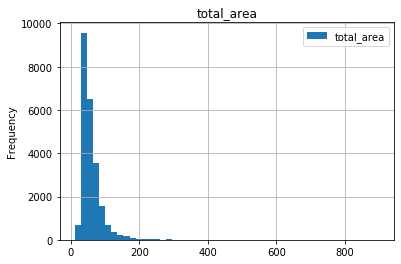

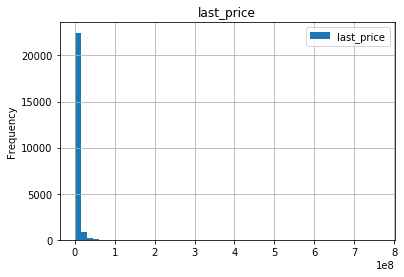

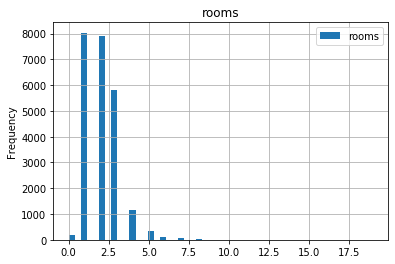

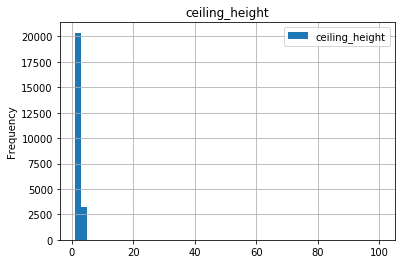

In [18]:
estate_param = estate_data.loc[:, ['total_area', 'last_price', 'rooms', 'ceiling_height']]
display(estate_param.head())                               

for column in estate_param:
    estate_param.plot(kind = 'hist', y = column, grid = True, bins = 50, title = column)

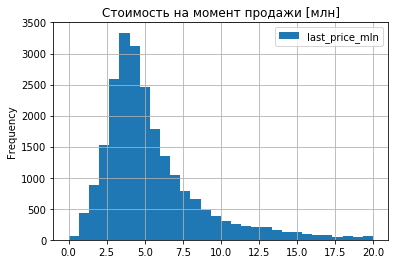

In [19]:
# some graphs did not get uninformative, because display parameters for all are set the same
estate_data['last_price_mln'] = estate_data['last_price'] / 1000000
estate_data['last_price_mln'].plot(
    kind = 'hist', 
    grid = True, 
    bins = 30, 
    range = (0, 20), 
    legend = True, 
    title = 'Стоимость на момент продажи [млн]')

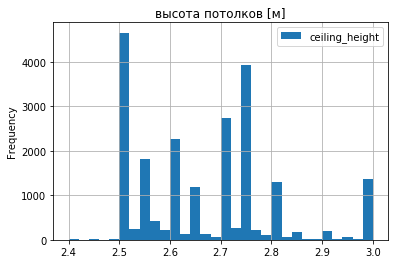

In [20]:
estate_data['ceiling_height'].plot(
    kind = 'hist', 
    grid = True, 
    bins = 30, 
    range = (2.4, 3), 
    legend = True, 
    title = 'высота потолков [м]')
plt.show()

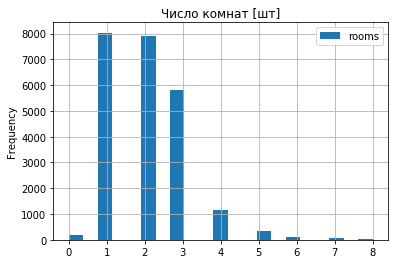

In [21]:
estate_data['rooms'].plot(
    kind = 'hist', 
    grid = True, 
    bins = 21, 
    range = (0, 8), 
    legend = True, 
    title = 'Число комнат [шт]')
plt.show()

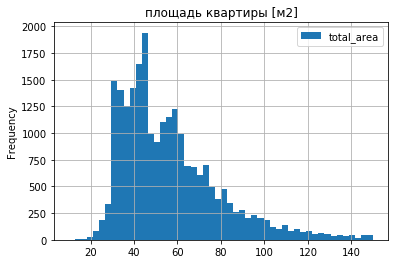

In [22]:
estate_data['total_area'].plot(
    kind = 'hist', 
    grid = True, 
    bins = 50, 
    range = (10, 150), 
    legend = True, 
    title = 'площадь квартиры [м2]')
plt.show()

Examine the selling times of the apartment. Plot a histogram. Calculate the mean and median. Describe how long the sale usually takes. When can sales be considered very fast and when unusually long?

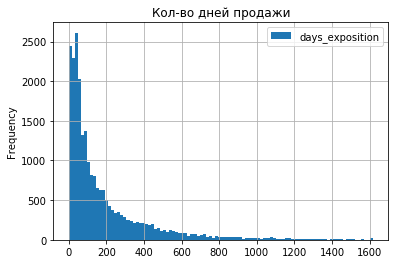

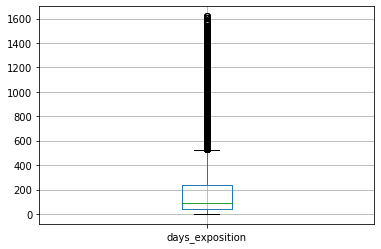

Медиана продолжительности продажи - 94.00 дней (дня)
Средняя продолжительности продажи - 185.71 дней (дня)
count    23650.000000
mean       185.714419
std        233.455771
min          0.000000
25%         43.000000
50%         94.000000
75%        237.000000
max       1618.000000
Name: days_exposition, dtype: float64



In [23]:
estate_data['days_exposition'].plot(
    kind = 'hist', 
    grid = True, 
    bins = 100, 
    legend = True, 
    title = 'Кол-во дней продажи')
plt.show()
estate_data.boxplot(column = 'days_exposition',grid = True)
plt.show()

median_days_exposition = estate_data['days_exposition'].median()
mean_days_exposition = estate_data['days_exposition'].mean()

print("Медиана продолжительности продажи - {:.2f} дней (дня)".format(median_days_exposition))
print("Средняя продолжительности продажи - {:.2f} дней (дня)".format(mean_days_exposition))

print(estate_data['days_exposition'].describe())
print()

The median (typical) duration of an apartment sale is 94 days, the average is almost 186 days. The median value takes into account "data outliers", so we will focus on it.

1st quartile - 0 to 25 days - an unusually fast sale

3rd quartile - 237 days or more - unusually slow selling

Remove rare and outliers. Describe what features you found.

In [24]:
estate_data.describe()

,index,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_сenters_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,meter_price,first_weekday,first_month,first_year,living_total_ratio,kitchen_total_ratio,last_price_mln
count,23650.000000,23650.000000,2.365000e+04,23650.000000,23650.000000,23650.000000,23650.000000,23650.000000,23650.000000,23650.000000,23650.000000,23650.000000,23650.000000,23650.000000,23650.000000,23650.000000,23650.000000,23650.000000,2.365000e+04,23650.000000,23650.000000,23650.000000,23650.000000,23650.000000,23650.000000
mean,11824.500000,9.862326,6.541127e+06,60.329069,2.070106,2.754335,10.686173,34.243378,5.893277,10.555384,0.591712,28803.225878,14197.860742,0.469091,2144.442241,0.590359,2046.578182,185.714419,9.943225e+04,2.568710,6.401564,2017.370021,0.565391,0.191743,6.541127
std,6827.311269,5.682278,1.089640e+07,35.661808,1.078620,1.068697,6.595970,21.571650,4.883317,5.783236,0.959662,11060.316633,7537.573291,0.748458,1206.162354,0.883539,1219.441136,233.455771,5.033794e+04,1.788808,3.491418,1.037806,0.118359,0.080276,10.896399
min,0.000000,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,0.000000,1.118349e+02,0.000000,1.000000,2014.000000,0.021583,0.021111,0.012190
25%,5912.250000,6.000000,3.400000e+06,40.000000,1.000000,2.550000,5.000000,18.700000,2.000000,7.100000,0.000000,21173.750000,10939.000000,0.000000,601.000000,0.000000,638.000000,43.000000,7.661497e+04,1.000000,3.000000,2017.000000,0.490632,0.133929,3.400000
50%,11824.500000,9.000000,4.650000e+06,52.000000,2.000000,2.700000,9.000000,30.200000,4.000000,9.400000,0.000000,28803.225878,14197.860742,0.000000,3000.000000,0.000000,3000.000000,94.000000,9.500000e+04,3.000000,6.000000,2017.000000,0.566667,0.174464,4.650000
75%,17736.750000,14.000000,6.799000e+06,69.700000,3.000000,2.754335,16.000000,42.000000,8.000000,11.850000,1.000000,34358.000000,15247.000000,1.000000,3000.000000,1.000000,3000.000000,237.000000,1.142742e+05,4.000000,10.000000,2018.000000,0.639364,0.236842,6.799000
max,23649.000000,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,3000.000000,1618.000000,1.907500e+06,6.000000,12.000000,2019.000000,2.634106,1.072874,763.000000


supposed anomalies:

1. the area of the apartment is maximum = 900 sq.
2. Maximum number of rooms = 19
3. Ceiling height maximum = 100 meters, minimum = 1 meter
4. the house with 60 floors looks interesting
5. Minimum living area 2 sq m, error?
6. kitchen 1.3 square meters or 112 square meters
7. 5 balconies? check
8. Is the apartment at the airport? Dubious
9. 65 km to the city center? maybe if the house is in the area

Let's take a look at the data cut:

In [25]:
estate_data.query('total_area == 900')

,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_сenters_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,meter_price,first_weekday,first_month,first_year,floor_name,living_total_ratio,kitchen_total_ratio,last_price_mln
5744,5744,8,420000000.0,900.0,2017-12-06,12,2.8,25,409.7,25,False,False,False,112.0,0,санкт-петербург,30706.0,7877.0,0,3000.0,2,318.0,106.0,466666.666667,2,12,2017,последний,0.455222,0.124444,420.0


most likely this is not an apartment, commercial real estate "for an office". Let's fix it for apartments.

In [26]:
estate_data.query('rooms == 19')

,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_сenters_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,meter_price,first_weekday,first_month,first_year,floor_name,living_total_ratio,kitchen_total_ratio,last_price_mln
21340,21340,6,32250000.0,374.6,2018-06-09,19,2.754335,5,264.5,2,False,False,False,27.6,0,санкт-петербург,19497.0,3574.0,0,3000.0,2,548.0,114.0,86091.831287,5,6,2018,другой,0.706086,0.073679,32.25


large apartment, everything is fine.

In [27]:
estate_data.query('ceiling_height == 100')

,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_сenters_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,meter_price,first_weekday,first_month,first_year,floor_name,living_total_ratio,kitchen_total_ratio,last_price_mln
23499,23499,0,15000000.0,25.0,2018-07-25,1,100.0,5,14.0,5,True,False,False,11.0,5,санкт-петербург,34963.0,8283.0,1,223.0,3,30.0,19.0,600000.0,2,7,2018,последний,0.56,0.44,15.0


ceiling height 100 meters, a clear error

In [28]:
estate_data.query('ceiling_height == 1')

,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_сenters_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,meter_price,first_weekday,first_month,first_year,floor_name,living_total_ratio,kitchen_total_ratio,last_price_mln
15534,15534,16,6000000.0,55.0,2018-10-31,2,1.0,12,32.4,7,False,False,False,10.0,0,санкт-петербург,33053.0,14217.0,2,293.0,2,289.0,13.0,109090.909091,2,10,2018,другой,0.589091,0.181818,6.0


ceiling height 1 meter, clear error

In [29]:
estate_data.query('floors_total == 60')

,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_сenters_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,meter_price,first_weekday,first_month,first_year,floor_name,living_total_ratio,kitchen_total_ratio,last_price_mln
10986,10986,12,3800000.0,45.5,2018-06-28,2,2.88,60,27.4,4,False,False,False,7.4,0,кронштадт,67763.0,49488.0,2,342.0,3,614.0,166.0,83516.483516,3,6,2018,другой,0.602198,0.162637,3.8


There are no 60-storey buildings in St. Petersburg and the surrounding area. Maybe 6th floor?

In [30]:
estate_data.query('living_area == 2')

,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_сenters_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,meter_price,first_weekday,first_month,first_year,floor_name,living_total_ratio,kitchen_total_ratio,last_price_mln
614,614,0,2330000.0,23.0,2018-01-01,0,2.7,24,2.0,22,False,True,False,10.555384,0,посёлок мурино,28803.225878,14197.860742,0,3000.0,0,3000.0,66.0,101304.347826,0,1,2018,другой,0.086957,0.458930,2.33
21086,21086,20,6350000.0,52.0,2018-02-06,2,3.0,6,2.0,2,False,False,False,9.000000,0,санкт-петербург,32453.000000,6521.000000,0,3000.0,1,1012.0,91.0,122115.384615,1,2,2018,другой,0.038462,0.173077,6.35


living area 2 meters, data error

In [31]:
estate_data.query('kitchen_area == 1.3')

,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_сenters_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,meter_price,first_weekday,first_month,first_year,floor_name,living_total_ratio,kitchen_total_ratio,last_price_mln
4919,4919,7,4250000.0,28.5,2019-05-01,1,2.8,14,19.5,10,False,False,False,1.3,0,санкт-петербург,37199.0,12721.0,0,3000.0,0,3000.0,2.0,149122.807018,2,5,2019,другой,0.684211,0.045614,4.25


kitchen 1.3 meters, did not meet such. Wrong.

In [32]:
estate_data.query('kitchen_area == 112')

,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_сenters_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,meter_price,first_weekday,first_month,first_year,floor_name,living_total_ratio,kitchen_total_ratio,last_price_mln
5744,5744,8,420000000.0,900.0,2017-12-06,12,2.8,25,409.7,25,False,False,False,112.0,0,санкт-петербург,30706.0,7877.0,0,3000.0,2,318.0,106.0,466666.666667,2,12,2017,последний,0.455222,0.124444,420.0


big house, big kitchen. Everything is good.

In [33]:
estate_data.query('balcony == 5')

,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_сenters_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,meter_price,first_weekday,first_month,first_year,floor_name,living_total_ratio,kitchen_total_ratio,last_price_mln
5,5,9,8000000.0,70.00,2016-06-21,2,2.75,17,37.00,4,False,False,False,12.00,5,санкт-петербург,18863.000000,16028.000000,1,482.0,2,755.0,93.0,114285.714286,1,6,2016,другой,0.528571,0.171429,8.000
245,245,5,3445000.0,35.95,2018-08-28,1,2.55,22,16.00,19,False,False,False,9.65,5,посёлок мурино,28803.225878,14197.860742,0,3000.0,0,3000.0,239.0,95827.538248,1,8,2018,другой,0.445063,0.268428,3.445
278,278,8,3300000.0,35.00,2018-09-21,1,2.70,16,15.00,14,False,False,False,9.00,5,посёлок мурино,28803.225878,14197.860742,0,3000.0,0,3000.0,162.0,94285.714286,4,9,2018,другой,0.428571,0.257143,3.300
414,414,10,4300000.0,52.00,2019-04-21,1,2.70,16,28.00,8,False,False,False,11.00,5,посёлок мурино,28803.225878,14197.860742,0,3000.0,0,3000.0,12.0,82692.307692,6,4,2019,другой,0.538462,0.211538,4.300
462,462,10,3480000.0,43.00,2018-03-03,2,2.70,18,23.40,15,False,False,False,9.00,5,посёлок мурино,28803.225878,14197.860742,0,3000.0,0,3000.0,33.0,80930.232558,5,3,2018,другой,0.544186,0.209302,3.480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23478,23478,14,7018000.0,66.00,2018-08-17,3,2.70,16,38.91,13,False,False,False,9.91,5,санкт-петербург,43121.000000,8976.000000,0,3000.0,0,3000.0,87.0,106333.333333,4,8,2018,другой,0.589545,0.150152,7.018
23499,23499,0,15000000.0,25.00,2018-07-25,1,100.00,5,14.00,5,True,False,False,11.00,5,санкт-петербург,34963.000000,8283.000000,1,223.0,3,30.0,19.0,600000.000000,2,7,2018,последний,0.560000,0.440000,15.000
23549,23549,12,6200000.0,96.00,2017-04-16,4,2.70,9,69.00,5,False,False,False,11.10,5,красное село,25679.000000,29103.000000,0,3000.0,0,3000.0,747.0,64583.333333,6,4,2017,другой,0.718750,0.115625,6.200
23585,23585,13,7000000.0,88.00,2018-03-02,3,2.50,15,54.00,12,False,False,False,12.00,5,колпино,24501.000000,30287.000000,1,372.0,0,3000.0,427.0,79545.454545,4,3,2018,другой,0.613636,0.136364,7.000


We haven't seen 5 balcony apartments in St. Petersburg, most likely a data error. Fortunately, there are only 304 such entries.

In [34]:
estate_data.query('airports_nearest == 0')

,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_сenters_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,meter_price,first_weekday,first_month,first_year,floor_name,living_total_ratio,kitchen_total_ratio,last_price_mln
23162,23162,0,7000000.0,34.7,2018-09-23,1,2.7,9,19.8,3,False,False,False,6.0,2,санкт-петербург,0.0,22801.0,0,3000.0,0,3000.0,60.0,201729.106628,6,9,2018,другой,0.570605,0.172911,7.0


At the airport, our apartments are not yet sold, although this is probably convenient. First place in the queue is guaranteed.

In [35]:
estate_data.query('city_сenters_nearest == 65968')

,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_сenters_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,meter_price,first_weekday,first_month,first_year,floor_name,living_total_ratio,kitchen_total_ratio,last_price_mln
19046,19046,8,4200000.0,51.4,2014-12-10,2,2.55,5,31.0,2,False,False,False,6.0,1,посёлок молодёжное,84869.0,65968.0,0,3000.0,0,3000.0,1194.0,81712.062257,2,12,2014,другой,0.603113,0.116732,4.2


The apartment is in the village, most likely the center is really far away.

In [36]:
# create a new DF free of emissions
good_data = estate_data
good_data.loc[estate_data['total_area'] == 900, 'is_apartment'] = True
good_data = good_data.query('(ceiling_height <= 4) and (ceiling_height >= 2.2)  \
    and (balcony <= 3) and (airports_nearest >= 500) and (kitchen_area >= 5)  \
    and (living_area >= 5) and (floors_total <= 40)')

print("осталось строк в выборке поле чистки:", len(good_data))

осталось строк в выборке поле чистки: 22941


What factors most affect the cost of an apartment? Investigate whether the price depends on the area, number of rooms, distance from the center. Study the dependence of the price on the floor on which the apartment is located: the first, the last or the other. Also study the dependence on the date of placement: day of the week, month and year.

In [37]:
def city_country(column):
    if column == 'санкт-петербург':
        return "санкт-петербург"
    else:
        return "область"

good_data['region'] = good_data['locality_name'].apply(city_country)    

display(good_data.loc[:,['locality_name', 'region']].head(5))

param = good_data.loc[:,['total_images', 'last_price', 'total_area',
       'rooms', 'ceiling_height', 'floors_total',
       'living_area', 'floor',
       'kitchen_area', 'balcony', 'airports_nearest',
       'city_сenters_nearest', 'parks_around_3000', 'parks_nearest',
       'ponds_around_3000', 'ponds_nearest', 'meter_price',
       'living_total_ratio', 'kitchen_total_ratio', 'last_price_mln']]

print()
list_1 = []
list_2 = []
ratio_p = 0
for p in param:
    list_1.append(p)
    ratio_p = param['meter_price'].corr(param[p])
    list_2.append(ratio_p)                                    
    print("Коэф. кор. Пирсона между meter_price и параметра {}, {:.2f}".format(p,  ratio_p))
#result_dic = dict(zip(list_1, list_2))
#print(result_dic)
#print(result_dic.sort(key=lambda row: row[1], reverse = False))

,locality_name,region
0,санкт-петербург,санкт-петербург
1,санкт-петербург,санкт-петербург
3,санкт-петербург,санкт-петербург
4,санкт-петербург,санкт-петербург
6,санкт-петербург,санкт-петербург



Коэф. кор. Пирсона между meter_price и параметра total_images, 0.13
Коэф. кор. Пирсона между meter_price и параметра last_price, 0.73
Коэф. кор. Пирсона между meter_price и параметра total_area, 0.29
Коэф. кор. Пирсона между meter_price и параметра rooms, 0.05
Коэф. кор. Пирсона между meter_price и параметра ceiling_height, 0.35
Коэф. кор. Пирсона между meter_price и параметра floors_total, 0.15
Коэф. кор. Пирсона между meter_price и параметра living_area, 0.21
Коэф. кор. Пирсона между meter_price и параметра floor, 0.13
Коэф. кор. Пирсона между meter_price и параметра kitchen_area, 0.38
Коэф. кор. Пирсона между meter_price и параметра balcony, 0.01
Коэф. кор. Пирсона между meter_price и параметра airports_nearest, -0.03
Коэф. кор. Пирсона между meter_price и параметра city_сenters_nearest, -0.28
Коэф. кор. Пирсона между meter_price и параметра parks_around_3000, 0.29
Коэф. кор. Пирсона между meter_price и параметра parks_nearest, -0.27
Коэф. кор. Пирсона между meter_price и параметра

The price per square meter largely depends on:

     1. kitchen area
     2. height of ceilings
     3. proximity to the reservoir
     4. proximity to the park
     5. the area of the apartment

In [38]:
for p in param:
    ratio_last_p = param['last_price'].corr(param[p])                                   
    print("Коэф. кор. Пирсона между last_price и параметра {}, {:.2f}".format(p,  ratio_last_p))


Коэф. кор. Пирсона между last_price и параметра total_images, 0.10
Коэф. кор. Пирсона между last_price и параметра last_price, 1.00
Коэф. кор. Пирсона между last_price и параметра total_area, 0.64
Коэф. кор. Пирсона между last_price и параметра rooms, 0.35
Коэф. кор. Пирсона между last_price и параметра ceiling_height, 0.32
Коэф. кор. Пирсона между last_price и параметра floors_total, -0.00
Коэф. кор. Пирсона между last_price и параметра living_area, 0.54
Коэф. кор. Пирсона между last_price и параметра floor, 0.02
Коэф. кор. Пирсона между last_price и параметра kitchen_area, 0.45
Коэф. кор. Пирсона между last_price и параметра balcony, -0.02
Коэф. кор. Пирсона между last_price и параметра airports_nearest, -0.03
Коэф. кор. Пирсона между last_price и параметра city_сenters_nearest, -0.20
Коэф. кор. Пирсона между last_price и параметра parks_around_3000, 0.19
Коэф. кор. Пирсона между last_price и параметра parks_nearest, -0.16
Коэф. кор. Пирсона между last_price и параметра ponds_around_

The absolute price of an apartment largely depends on:

1. total area - 0.64
2. residential area - 0.54
3. kitchen area - 0.45
4. number of rooms - 0.35
5. ceiling height - 0.32

The location towards the center does not greatly affect the absolute value of the apartment (there is a negative relationship).

,last_price_mln
floor_name,
другой,4.8
первый,3.9
последний,4.3


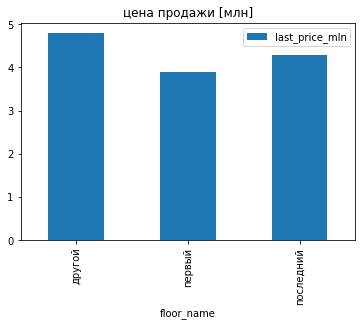

In [39]:
pivot_floor_price = good_data.pivot_table(
    index = ['floor_name'], 
    values = 'last_price_mln', 
    aggfunc = 'median')

pivot_floor_price.plot(kind = 'bar', title = 'цена продажи [млн]')
display(pivot_floor_price)

The cheapest apartments are on the first floor, then the last.
The most expensive apartments are between the first and the last floor.

,last_price_mln
first_weekday,
0,4.60
1,4.70
2,4.67
3,4.60
4,4.53
5,4.50
6,4.50


,last_price_mln
first_month,
1,4.60000
2,4.60000
3,4.65000
4,4.75497
5,4.50000
6,4.40000
7,4.60000
8,4.53750
9,4.69000


,last_price_mln
first_year,
2014,7.58
2015,5.30
2016,4.50
2017,4.50
2018,4.53
2019,5.00


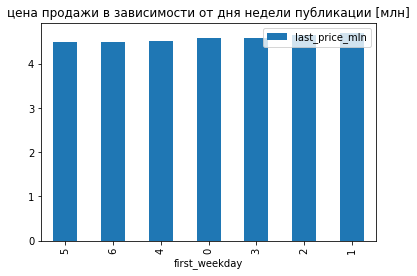

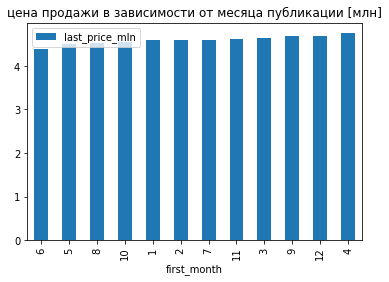

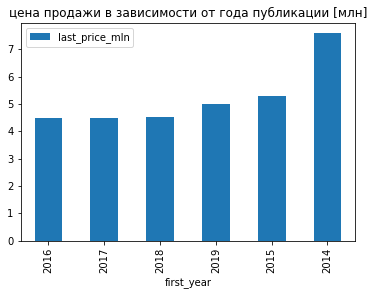

In [40]:
pivot_weekday_price = (good_data
                    .pivot_table(index = ['first_weekday'], values = 'last_price_mln', aggfunc = 'median')
                    .sort_values(by = 'last_price_mln', ascending = True)
                    .plot(kind = 'bar', title = 'цена продажи в зависимости от дня недели публикации [млн]'))
pivot_month_price = (good_data
                    .pivot_table(index = ['first_month'], values = 'last_price_mln', aggfunc = 'median')
                    .sort_values(by = 'last_price_mln', ascending = True)
                    .plot(kind = 'bar', title = 'цена продажи в зависимости от месяца публикации [млн]'))
pivot_year_price = (good_data
                    .pivot_table(index = ['first_year'], values = 'last_price_mln', aggfunc = 'median')
                    .sort_values(by = 'last_price_mln', ascending = True)
                    .plot(kind = 'bar', title = 'цена продажи в зависимости от года публикации [млн]'))
print()
display(good_data.pivot_table(index = ['first_weekday'], values = 'last_price_mln', aggfunc = 'median'))
print()
display(good_data.pivot_table(index = ['first_month'], values = 'last_price_mln', aggfunc = 'median'))
print()
display(good_data.pivot_table(index = ['first_year'], values = 'last_price_mln', aggfunc = 'median'))

1. the final cost of the apartment is slightly more expensive when placed on Tuesdays;
2. the final cost of the apartment is slightly more expensive when placed in May;
3. the final cost of the apartment is more expensive when placed in 2014 in relation to the rest of the years.

Select the 10 localities with the most ads. Calculate the average price per square meter in these settlements. Select among them the settlements with the highest and lowest housing costs. This data can be found by name in the 'locality_name' column.

In [41]:
grouped_city = (good_data
                .pivot_table(index = 'locality_name', values = 'meter_price', aggfunc = 'median')
                .sort_values(by = 'meter_price', ascending = False))
display(grouped_city.head(10))

,meter_price
locality_name,
посёлок лисий нос,121616.221359
санкт-петербург,104534.005038
зеленогорск,103333.333333
пушкин,100000.000000
кудрово,100000.000000
сестрорецк,99759.615385
посёлок левашово,96997.690531
деревня кудрово,92044.864227
посёлок парголово,91642.857143


The most expensive cost per square meter was obtained in the village of "Lisiy Nos", followed by "St. Petersburg" and "Zelenogorsk".

Study the offers of apartments: for each apartment there is information about the distance to the center. Highlight apartments in St. Petersburg ('locality_name'). Your task is to find out which area is included in the center. Create a column with distance to center in kilometers: round up to whole numbers. Then calculate the average price for each kilometer. Build a chart: it should show how the price depends on the distance from the center. Define a border where the graph changes a lot - this will be the central zone.

count    15249.000000
mean        11.125451
std          4.839536
min          0.000000
25%          8.000000
50%         12.000000
75%         14.000000
max         29.000000
Name: center_km, dtype: float64


-0.25443197987424393


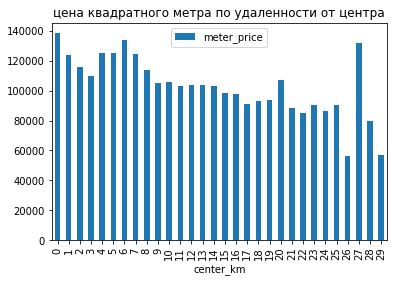

In [42]:
sankt_peter = good_data.query('locality_name == "санкт-петербург"')
sankt_peter['center_km'] = (sankt_peter['city_сenters_nearest'] / 1000).astype(int)
display(sankt_peter['center_km'].describe())
print()
print(sankt_peter['last_price'].corr(sankt_peter['center_km']))
pivot_km = (sankt_peter
                .pivot_table(index = 'center_km', values = 'meter_price', aggfunc = 'median')
                .plot(kind = 'bar', title = 'цена квадратного метра по удаленности от центра'))

Taking into account the readings of the graph, we can conclude that the center of St. Petersburg is located in the interval from 0 to 7 kilometers inclusive.

Highlight the segment of apartments in the center. Analyze this territory and study the following parameters: area, price, number of rooms, ceiling height. Also highlight the factors that affect the cost of an apartment (number of rooms, floor, distance from the center, date of the announcement). Draw your conclusions. Are they different from general findings across the city?

In [43]:
# centre
center = sankt_peter.query('center_km <= 7')
center.describe()
cen_param = center.loc[:,['last_price', 'total_area',
       'rooms', 'ceiling_height',
       'living_area', 'floor',
       'kitchen_area', 'balcony', 'airports_nearest',
       'city_сenters_nearest', 'parks_around_3000', 'parks_nearest',
       'ponds_around_3000', 'ponds_nearest', 'meter_price', 'last_price_mln',
       'center_km']]

depend = 0                       
for col in cen_param:
    depend = cen_param['last_price'].corr(cen_param[col])                                   
    print("Коэф. кор. Пирсона между last_price и параметра {}, {:.2f}".format(col,  depend))

Коэф. кор. Пирсона между last_price и параметра last_price, 1.00
Коэф. кор. Пирсона между last_price и параметра total_area, 0.63
Коэф. кор. Пирсона между last_price и параметра rooms, 0.32
Коэф. кор. Пирсона между last_price и параметра ceiling_height, 0.16
Коэф. кор. Пирсона между last_price и параметра living_area, 0.51
Коэф. кор. Пирсона между last_price и параметра floor, 0.12
Коэф. кор. Пирсона между last_price и параметра kitchen_area, 0.41
Коэф. кор. Пирсона между last_price и параметра balcony, 0.06
Коэф. кор. Пирсона между last_price и параметра airports_nearest, 0.09
Коэф. кор. Пирсона между last_price и параметра city_сenters_nearest, -0.06
Коэф. кор. Пирсона между last_price и параметра parks_around_3000, 0.10
Коэф. кор. Пирсона между last_price и параметра parks_nearest, -0.05
Коэф. кор. Пирсона между last_price и параметра ponds_around_3000, 0.11
Коэф. кор. Пирсона между last_price и параметра ponds_nearest, -0.07
Коэф. кор. Пирсона между last_price и параметра meter_pri

sample from the center of St. Petersburg. The price of an apartment depends on:
    
1. total area - 0.63
2. residential area - 0.51
3. kitchen area - 0.41
4. number of rooms - 0.32
5. ceiling height - 0.32

The total sample price of an apartment is more dependent on:

1. total area - 0.64
2. residential area - 0.54
3. kitchen area - 0.45
4. number of rooms - 0.35
5. ceiling height - 0.32

As we can see the absolute price of an apartment in the center of St. Petersburg and in general depends on the same parameters,
however, the relationship between these parameters and the price in the center of St. Petersburg is somewhat weaker.
    

,last_price_mln
first_weekday,
0,9.300
1,9.000
2,9.000
3,9.000
4,8.900
5,8.500
6,9.095


,last_price_mln
first_month,
1,9.900000
2,9.495000
3,9.350000
4,8.775000
5,8.684000
6,8.750000
7,9.000000
8,8.900000
9,9.400000


,last_price_mln
first_year,
2014,19.800
2015,9.995
2016,9.400
2017,8.900
2018,8.695
2019,9.350


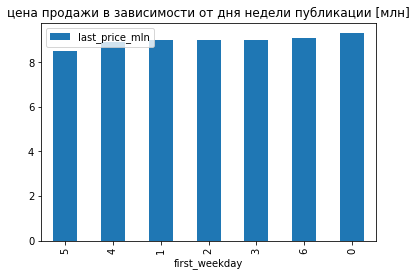

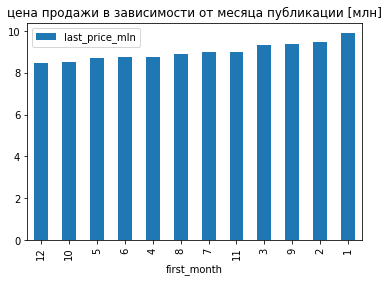

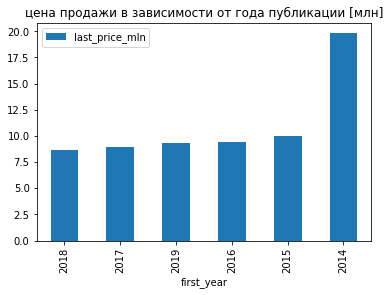

In [44]:
center_pivot_weekday_price = (center
                    .pivot_table(index = ['first_weekday'], values = 'last_price_mln', aggfunc = 'median')
                    .sort_values(by = 'last_price_mln', ascending = True)
                    .plot(kind = 'bar', title = 'цена продажи в зависимости от дня недели публикации [млн]'))
center_pivot_month_price = (center
                    .pivot_table(index = ['first_month'], values = 'last_price_mln', aggfunc = 'median')
                    .sort_values(by = 'last_price_mln', ascending = True)
                    .plot(kind = 'bar', title = 'цена продажи в зависимости от месяца публикации [млн]'))
center_pivot_year_price = (center
                    .pivot_table(index = ['first_year'], values = 'last_price_mln', aggfunc = 'median')
                    .sort_values(by = 'last_price_mln', ascending = True)
                    .plot(kind = 'bar', title = 'цена продажи в зависимости от года публикации [млн]'))
print()
display(center.pivot_table(index = ['first_weekday'], values = 'last_price_mln', aggfunc = 'median'))
print()
display(center.pivot_table(index = ['first_month'], values = 'last_price_mln', aggfunc = 'median'))
print()
display(center.pivot_table(index = ['first_year'], values = 'last_price_mln', aggfunc = 'median'))

Comparing apartments in the center of St. Petersburg with other data, it can be seen that the price in the center is significantly higher, about 9 million versus 4.5 in other regions.

1. final selling price in the center is higher when published on Monday, Tuesday - other regions
2. the final selling price in the center is the highest when published in January, May - for other regions
3. the final selling price in the center, as well as in other regions, was higher in 2014, but the difference from the 15th year is almost 2 times.


<a href='#Начало'>В начало</a>

### Step 5. General conclusion
<a id='Шаг 5'></a>

The median cost of an apartment in St. Petersburg and the surrounding area is 4.5 million. For this money, you can buy an apartment from 32.6 to 104 meters, depending on the location.
The height of the ceilings in the sample is from 2.5 to 3.0 meters. At the same time, there are quite a lot of apartments with a ceiling height of 2.5, more than 4 thousand.
Most of them sell apartments with 1, 2 and 3 rooms.
The area of ​​apartments varies from 20 to 145 meters. Most of the proposals with an area of ​​40-45 sq.m.
The median duration of apartment sales is 94 days, the minimum is 0, and the maximum is 1618 days.
The sample often contains outliers, atypical values. For example, a ceiling height of 100 meters, apartments with 5 balconies or an airport location.
They can be excluded from the sample, most likely these are erroneous data.
The main parameters on which the price of an apartment depends are the total area, living area, kitchen area, number of rooms, ceiling height.
There is a relationship between the price of an apartment and the floor. Apartments on the first and top floor are cheaper.
As it turned out, there is a relationship between the price of an apartment and its location to the center, but using the Pearson correlation coefficient, this relationship could not be determined, only with the help of a separate study.
It should be noted that there are differences in the cost of the apartment and the time of its publication relative to the month or day:

1. final selling price in the center is higher when published on Monday, Tuesday - other regions
2. the final selling price in the center is the highest when published in January, May - for other regions

It is noteworthy that the final sale price in the center, as well as in other regions, was higher in 2014. There have been global changes in the real estate market.
Presumably due to the unstable situation, demand increased sharply, prices went up. But this is already a separate topic for research.


### Project readiness checklist


- [x] file open
- [x] files examined (first lines are displayed, method info ())
- [x] missing values ​​defined
- [x] filled in missing values
- [x] there is an explanation of which missing values were found
- [x] data types changed
- [x] there is an explanation of which columns the types were changed and why
- [x] calculated and added to the table: price per square meter
- [x] calculated and added to the table: day of the week, month and year of publication of the ad
- [x] calculated and added to the table: apartment floor; options - first, last, other
- [x] calculated and added to the table: the ratio of residential and total area, as well as the ratio of kitchen area to total
- [x] the following parameters were studied: area, price, number of rooms, ceiling height
- [x] plotted histograms for each parameter
- [x] completed the task: "Study the time of the apartment's sale. Build a histogram. Calculate the average and median. Describe how long a sale usually takes. When can we assume that sales were very fast, and when unusually long?"
- [x] completed the task: "Remove rare and out-of-the-box values. Describe the features you found."
- [x] completed the task: "What factors most affect the cost of an apartment? Study whether the price depends on a square meter, number of rooms, floor (first or last), distance from the center. Also study the dependence on the date of placement: day of the week, month and year. "Select the 10 localities with the highest number of ads. Calculate the average price per square meter in these settlements. Highlight localities with the highest and lowest housing costs. This data can be found by name in the '* locality_name' * column. "
- [x] completed the task: "Study the offers of apartments: for each apartment there is information about the distance to the center. Select apartments in St. Petersburg (* 'locality_name' *). Your task is to find out which area is included in the center. Create a column with distance to the center in kilometers: round up to whole values. Then calculate the average price for each kilometer. Build a graph: it should show how the price depends on the distance from the center. Define the border where the graph changes a lot - this will be the central zone. "
- [x] completed the task: "Select a segment of apartments in the center. Analyze this area and study the following parameters: area, price, number of rooms, ceiling height. Also select the factors that affect the cost of an apartment (number of rooms, floor, distance from the center , date of the announcement). Draw conclusions. Are they different from the general conclusions throughout the city? "
- [x] in each stage there are conclusions
- [x] there is a general conclusion